In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marriage-and-divorce-in-iran/Marriage and divorce in Iran.csv


lets import the Dataset

In [2]:
df = pd.read_csv('/kaggle/input/marriage-and-divorce-in-iran/Marriage and divorce in Iran.csv')

In [3]:
df.head(6)

,Year,marriage(country),divorce(country),marriage(city),divorce(city),marriage(village),divorce(village)
0,1358,302667,21170,173963,15445,128704,5725
1,1359,337119,23987,196029,19293,141090,4694
2,1360,294499,24423,183546,20449,110953,3974
3,1361,353944,31221,215077,25773,138867,5448
4,1362,410799,35867,259433,30808,151366,5059
5,1363,384876,35178,247253,29047,137623,6131


ok..It seems like we don't have any categorical columns.

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Year                 0
marriage(country)    0
divorce(country)     0
marriage(city)       0
divorce(city)        0
marriage(village)    0
divorce(village)     0
dtype: int64

thats perfect👌🤲

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               42 non-null     object
 1   marriage(country)  42 non-null     int64 
 2   divorce(country)   42 non-null     int64 
 3   marriage(city)     42 non-null     object
 4   divorce(city)      42 non-null     object
 5   marriage(village)  42 non-null     object
 6   divorce(village)   42 non-null     object
dtypes: int64(2), object(5)
memory usage: 2.4+ KB


Now, let's visualize the dataset

In [7]:
df['Year'].unique()

array(['1358', '1359', '1360', '1361', '1362', '1363', '1364', '1365',
       '1366', '1367', '1368', '1369', '1370', '1371', '1372', '1373',
       '1374', '1375', '1376', '1377', '1378', '1379', '1380', '1381',
       '1382', '1383', '1384', '1385', '1386', '1387', '1388', '1389',
       '1390', '1391', '1392', '1393', '1394', '1395', '1396(2)',
       '1397(2)', '1398', '1399'], dtype=object)

In [8]:
df['Year'] = df['Year'].str.replace('(2)','').astype(int)

df['Year'].unique()

array([1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368,
       1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379,
       1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390,
       1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399])

In [9]:
df['marriage(city)'] = pd.to_numeric(df['marriage(city)'], errors='coerce')
df['divorce(city)'] =pd.to_numeric(df['divorce(city)'], errors='coerce')      
df['marriage(village)'] =pd.to_numeric(df['marriage(village)'], errors='coerce')
df['divorce(village)']=pd.to_numeric(df['divorce(village)'], errors='coerce')


In [10]:
df.isnull().sum()

Year                 0
marriage(country)    0
divorce(country)     0
marriage(city)       5
divorce(city)        5
marriage(village)    5
divorce(village)     5
dtype: int64

In [11]:
df[df.isnull().any(axis=True)]

,Year,marriage(country),divorce(country),marriage(city),divorce(city),marriage(village),divorce(village)
28,1386,841107,99852,NaN,NaN,NaN,NaN
29,1387,881592,110510,NaN,NaN,NaN,NaN
30,1388,890208,125747,NaN,NaN,NaN,NaN
31,1389,891627,137200,NaN,NaN,NaN,NaN
32,1390,874792,142841,NaN,NaN,NaN,NaN


In [12]:
df.loc[28,['marriage(city)','divorce(city)' ,'marriage(village)','divorce(village)']]=[602309,84120,238798,15732]
df.loc[29,['marriage(city)','divorce(city)' ,'marriage(village)','divorce(village)']]=[633179,93496,248413,17014]
df.loc[30,['marriage(city)','divorce(city)' ,'marriage(village)','divorce(village)']]=[629893,106548,260315,19199]
df.loc[31,['marriage(city)','divorce(city)' ,'marriage(village)','divorce(village)']]=[622398,116643,269230,20557]
df.loc[32,['marriage(city)','divorce(city)' ,'marriage(village)','divorce(village)']]=[631457,121091,243335,21750]
df.reset_index(inplace=True)

In [13]:
df.isnull().sum()

index                0
Year                 0
marriage(country)    0
divorce(country)     0
marriage(city)       0
divorce(city)        0
marriage(village)    0
divorce(village)     0
dtype: int64

In [14]:
df.set_index('Year',drop=False,inplace=True)

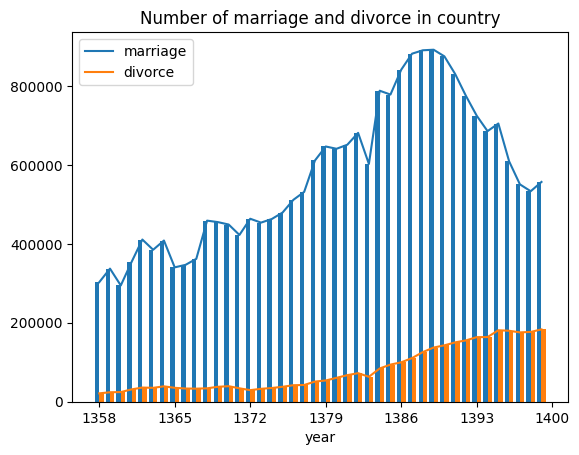

<Figure size 500x3000 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.figure(figsize=(5,30))
ax.plot(df['marriage(country)'])
ax.plot(df['divorce(country)'])
ax.bar(df['Year'] - 0.2, df['marriage(country)'], width=0.4, label='marriage(country)', align='center')
ax.bar(df['Year'] + 0.2, df['divorce(country)'], width=0.4, label='divorce(country)', align='center')
ax.set(xticks=np.arange(1358,1401,7),title='Number of marriage and divorce in country', xlabel='year')
ax.legend(['marriage', 'divorce'])
plt.show()

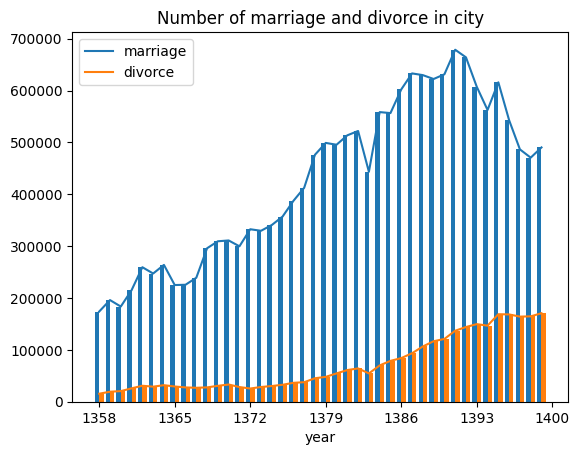

<Figure size 500x3000 with 0 Axes>

In [16]:
fig, ax = plt.subplots()
plt.figure(figsize=(5,30))
ax.plot(df['marriage(city)'])
ax.plot(df['divorce(city)'])
ax.bar(df['Year'] - 0.2, df['marriage(city)'], width=0.4, label='marriage(city)', align='center')
ax.bar(df['Year'] + 0.2, df['divorce(city)'], width=0.4, label='divorce(city)', align='center')
ax.set(xticks=np.arange(1358,1401,7),title='Number of marriage and divorce in city', xlabel='year')
ax.legend(['marriage', 'divorce'])
plt.show()

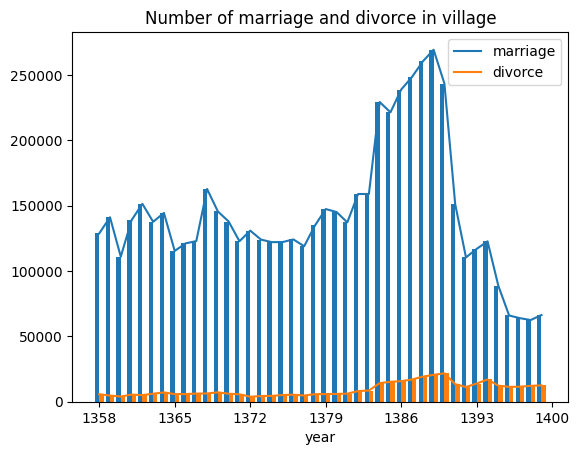

<Figure size 500x3000 with 0 Axes>

In [17]:
fig, ax = plt.subplots()
plt.figure(figsize=(5,30))
ax.plot(df['marriage(village)'])
ax.plot(df['divorce(village)'])
ax.bar(df['Year'] - 0.2, df['marriage(village)'], width=0.4, label='marriage(village)', align='center')
ax.bar(df['Year'] + 0.2, df['divorce(village)'], width=0.4, label='divorce(village)', align='center')
ax.set(xticks=np.arange(1358,1401,7),title='Number of marriage and divorce in village', xlabel='year')
ax.legend(['marriage', 'divorce'])
plt.show()

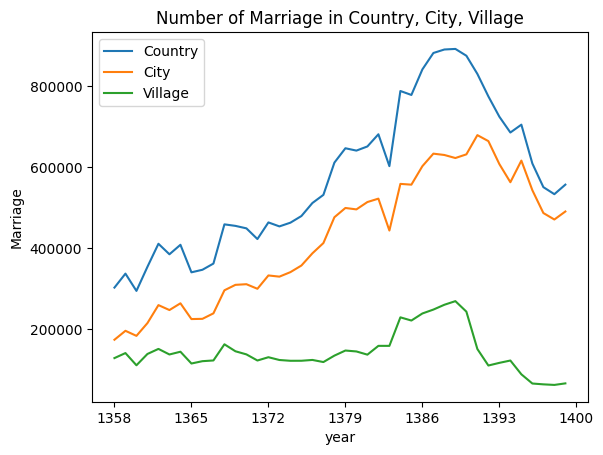

<Figure size 500x3000 with 0 Axes>

In [18]:
fig, ax = plt.subplots()
plt.figure(figsize=(5,30))
ax.plot(df['marriage(country)'], label='Country')
ax.plot(df['marriage(city)'],label='City')
ax.plot(df['marriage(village)'],label='Village')
ax.set(xticks=np.arange(1358,1401,7),ylabel='Marriage',title='Number of Marriage in Country, City, Village', xlabel='year')
ax.legend()
plt.show()


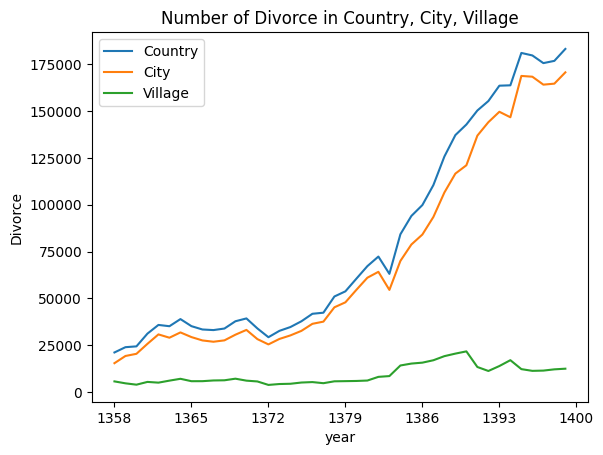

<Figure size 500x3000 with 0 Axes>

In [19]:
fig, ax = plt.subplots()
plt.figure(figsize=(5,30))
ax.plot(df['divorce(country)'], label='Country')
ax.plot(df['divorce(city)'],label='City')
ax.plot(df['divorce(village)'],label='Village')
ax.set(xticks=np.arange(1358,1401,7),ylabel='Divorce',title='Number of Divorce in Country, City, Village', xlabel='year')
ax.legend()
plt.show()

In [20]:
df['percentage(country)'] = (df['divorce(country)']/df['marriage(country)'])*100
df['percentage(city)'] = (df['divorce(city)']/df['marriage(city)'])*100
df['percentage(village)'] = (df['divorce(village)']/df['marriage(village)'])*100

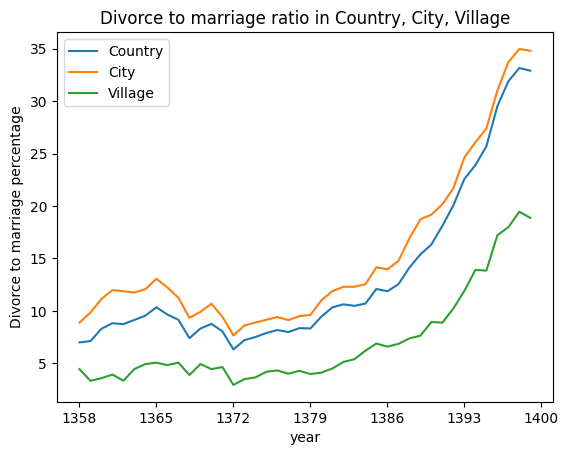

<Figure size 500x3000 with 0 Axes>

In [21]:
fig, ax = plt.subplots()
plt.figure(figsize=(5,30))
ax.plot(df['percentage(country)'], label='Country')
ax.plot(df['percentage(city)'],label='City')
ax.plot(df['percentage(village)'],label='Village')
ax.set(xticks=np.arange(1358,1401,7),ylabel='Divorce to marriage percentage',title='Divorce to marriage ratio in Country, City, Village', xlabel='year')
ax.legend()
plt.show()